<a href="https://colab.research.google.com/github/551997/551997/blob/main/Heart_Failure_and_The_Most_Common_Contributing_Factors_Erik_Gumilar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=60225cac41a10ac127d49e33d8d4e206b3eaf87fee8ea6a05f4b6e5752103f32
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pyforest
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

# Dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


This Dataset talk about Heart Failure on variance of patience. On this dataset there are 12 features. Features in this dataset are:


1.   Age
2.   Sex (gender)
3.   Type of Chest Pain
4.   Resting Blood Pressure
5.   Cholesterol
6.   Fasting Blood Sugar
7.   Resting Electro Cardiogram
8.   Max Heart Rate
9.   Exercise of Angina
10.   Oldpeak (Numeric value measured in depression)
11.   ST Slope
12.   Heart Disease







In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df1 = df

In [6]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Exploratory Data Analysis

## General Look of The Data

In [7]:
# head of Dataset
print(df1.head())

# tail of Dataset
print(df1.tail())

   Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0   40   M           ATA  ...      0.0        Up             0
1   49   F           NAP  ...      1.0      Flat             1
2   37   M           ATA  ...      0.0        Up             0
3   48   F           ASY  ...      1.5      Flat             1
4   54   M           NAP  ...      0.0        Up             0

[5 rows x 12 columns]
     Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
913   45   M            TA  ...      1.2      Flat             1
914   68   M           ASY  ...      3.4      Flat             1
915   57   M           ASY  ...      1.2      Flat             1
916   57   F           ATA  ...      0.0      Flat             1
917   38   M           NAP  ...      0.0        Up             0

[5 rows x 12 columns]


In [8]:
# The Columns of Dataset
df1.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Features on this dataset also became columns

In [9]:
print("There is", df1.shape[0], "observation and", df.shape[1], "columns in this dataset")

There is 918 observation and 12 columns in this dataset


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
print(df1.describe().T)
print(df1.describe(include=object).T)

              count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0
               count unique     top freq
Sex              918      2       M  725
ChestPainType    918      4     ASY  496
RestingECG       918      3  Normal  552
ExerciseAngina   918      2       N  547
ST_Slope         918      3    Flat  460


In [12]:
df1.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [13]:
for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df1[col].nunique()} unique value")

Age has 50 unique value
RestingBP has 67 unique value
Cholesterol has 222 unique value
FastingBS has 2 unique value
MaxHR has 119 unique value
Oldpeak has 53 unique value
HeartDisease has 2 unique value


## Split Data

In [14]:
numerical= df1.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = df1.select_dtypes('object').columns

print(f'Numerical Columns:  {df1[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df1[categorical].columns}')

Numerical Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')


Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


## Missing Value

Missing Values are occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.

In [15]:
# Define a functon that gonna show count of missing values and percentage of missing values

def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [16]:
missing(df1)

,Missing_Number,Missing_Percent
HeartDisease,0,0.0
ST_Slope,0,0.0
Oldpeak,0,0.0
ExerciseAngina,0,0.0
MaxHR,0,0.0
RestingECG,0,0.0
FastingBS,0,0.0
Cholesterol,0,0.0
RestingBP,0,0.0
ChestPainType,0,0.0


From the results of "Missing", dataset didn't have any of missing data.

## Set Age Data

In [17]:
df1['Age'].value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
59    35
62    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
46    24
43    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
39    15
67    15
66    13
69    13
40    13
37    11
35    11
68    10
70     7
74     7
34     7
36     6
71     5
32     5
72     4
75     3
29     3
31     2
77     2
33     2
76     2
30     1
73     1
28     1
Name: Age, dtype: int64

From the distribution of the age of the data, it was found that this data consisted mostly of elderly patients. Where the age of 50-60 is the most common age range in this data.

For better experience let's use countplot

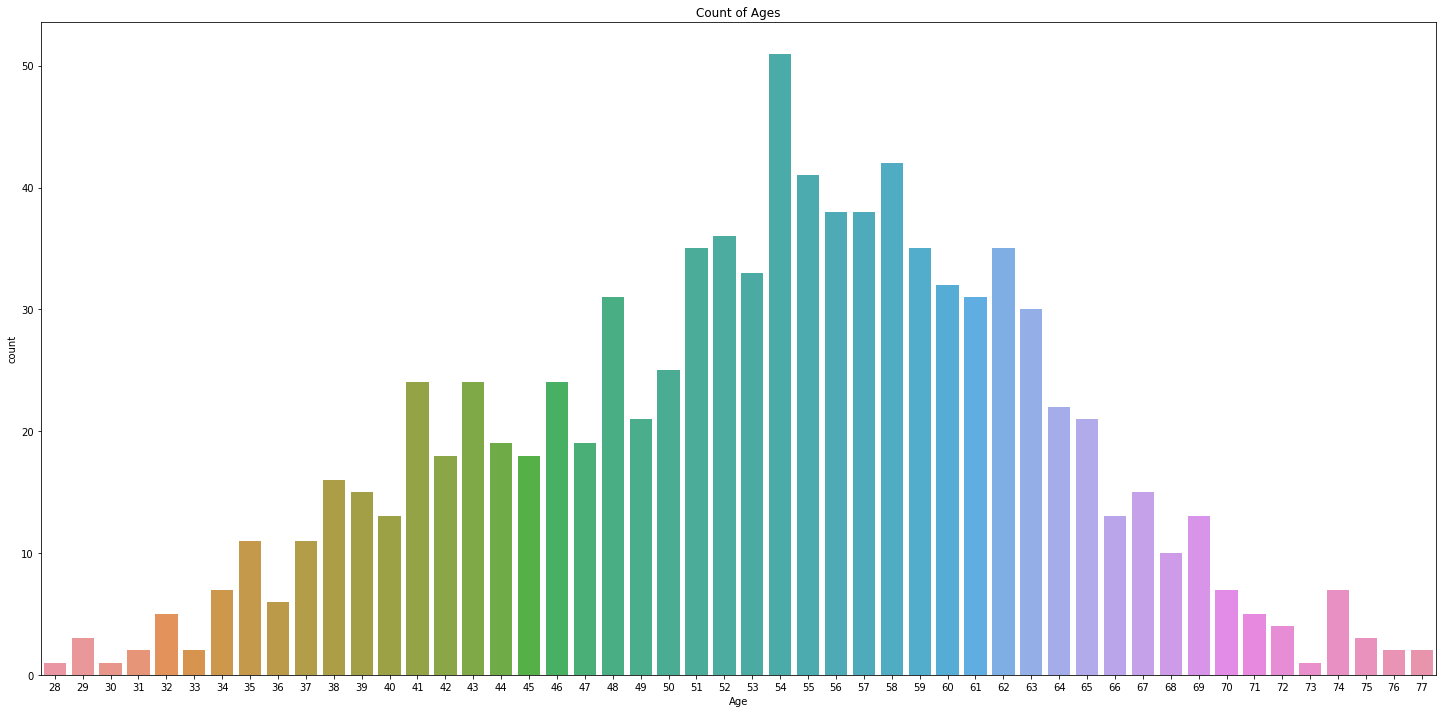

In [19]:
plt.figure(figsize = (25,12))
plt.title("Count of Ages")
sns.countplot(df1["Age"])

## Outlier Handling

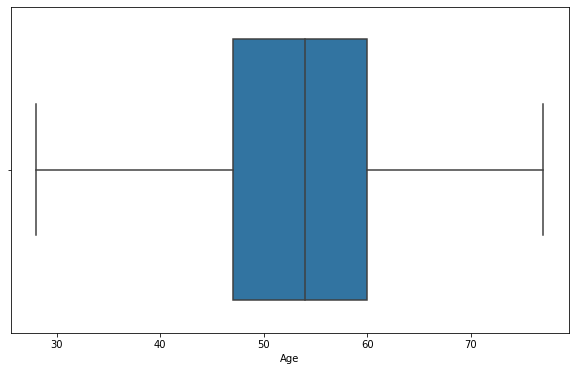

In [ ]:
sns.boxplot(data=df1,x = df1['Age'])

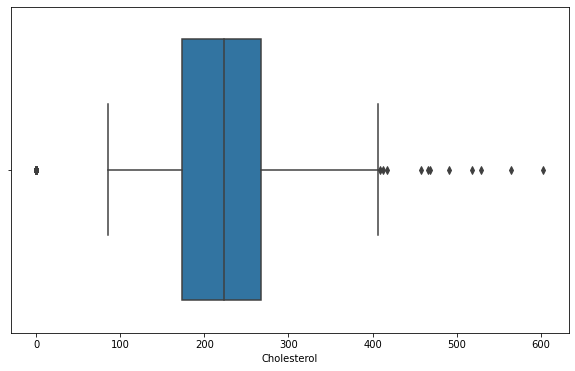

In [ ]:
sns.boxplot(data=df1,x = df1['Cholesterol'])

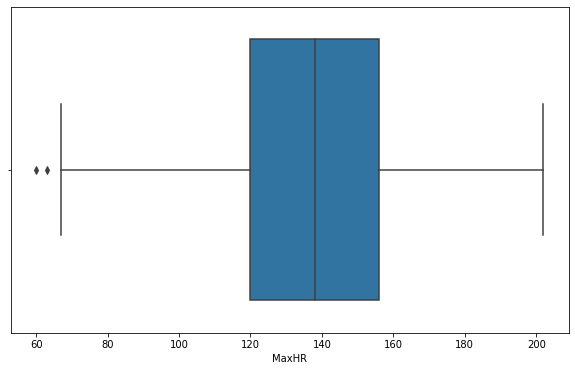

In [ ]:
sns.boxplot(data=df1,x = df1['MaxHR'])

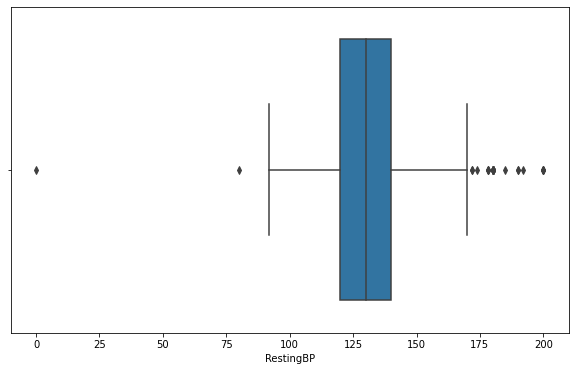

In [ ]:
sns.boxplot(data=df1,x = df1['RestingBP'])

Define a function to eliminate the outlier.

In [20]:
def outlier(x):
  Q1 = x.quantile(0.25)
  Q3 = x.quantile(0.75)
  IQR = Q3 - Q1
  lower_whisker = Q1 - 1.5*IQR
  upper_whisker = Q3 + 1.5*IQR
  print(lower_whisker, upper_whisker)
  

In [22]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in df1[numerical].columns:
    count_outliers(df1,i)

No outliers in Age
There are outliers in RestingBP
Count of outliers are: 28
There are outliers in Cholesterol
Count of outliers are: 183
There are outliers in FastingBS
Count of outliers are: 214
There are outliers in MaxHR
Count of outliers are: 2
There are outliers in Oldpeak
Count of outliers are: 16


In [23]:
outlier(df1[numerical])

Age            27.500
RestingBP      90.000
Cholesterol    32.625
FastingBS       0.000
MaxHR          66.000
Oldpeak        -2.250
dtype: float64 Age             79.500
RestingBP      170.000
Cholesterol    407.625
FastingBS        0.000
MaxHR          210.000
Oldpeak          3.750
dtype: float64


But we do not need to treatment the outlier because of the outlier didn't cause error to the analysis of the Dataset

## Label Encode

In [24]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Sex']=le.fit_transform(df['Sex'])
df['RestingECG']=le.fit_transform(df['RestingECG'])
df['ChestPainType']=le.fit_transform(df['ChestPainType'])
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=le.fit_transform(df['ST_Slope'])

df.head(50)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


# Data Visualization

We wil use Autoviz

In [ ]:
pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set loaded: (918, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    12 Predictors classified...
        No variables removed since no ID or low-information variables found in data set


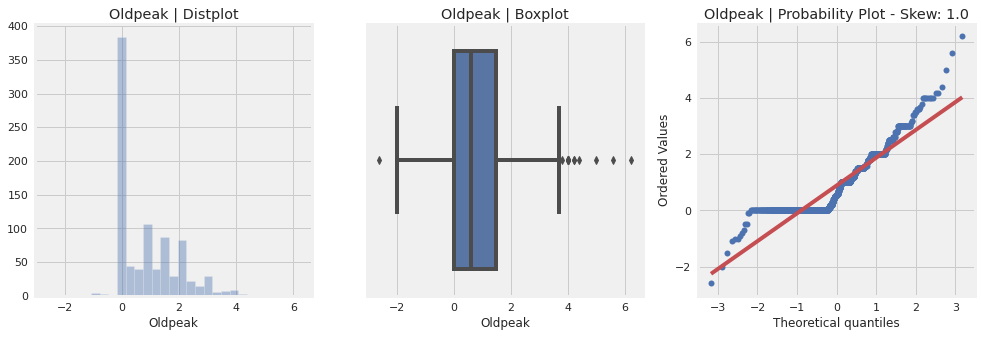

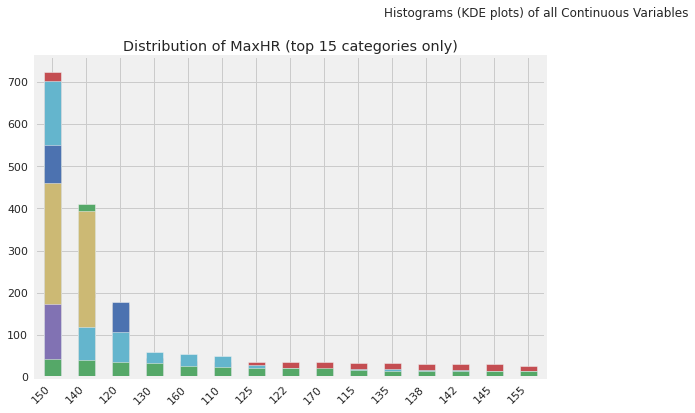

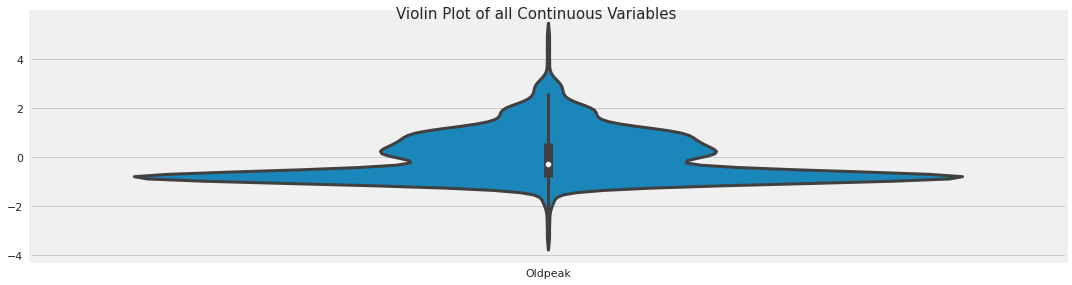

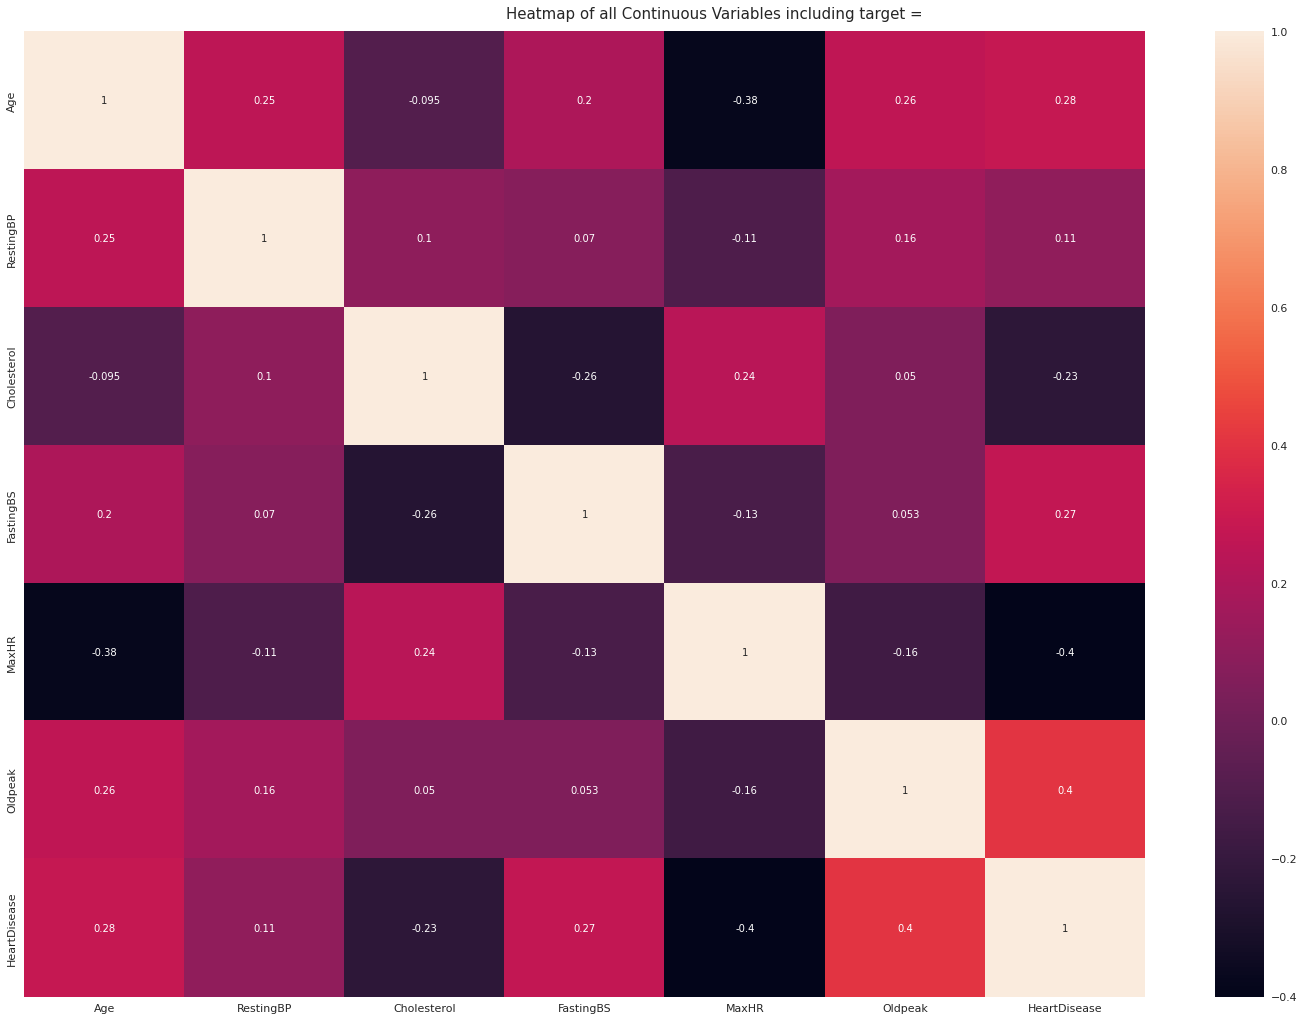

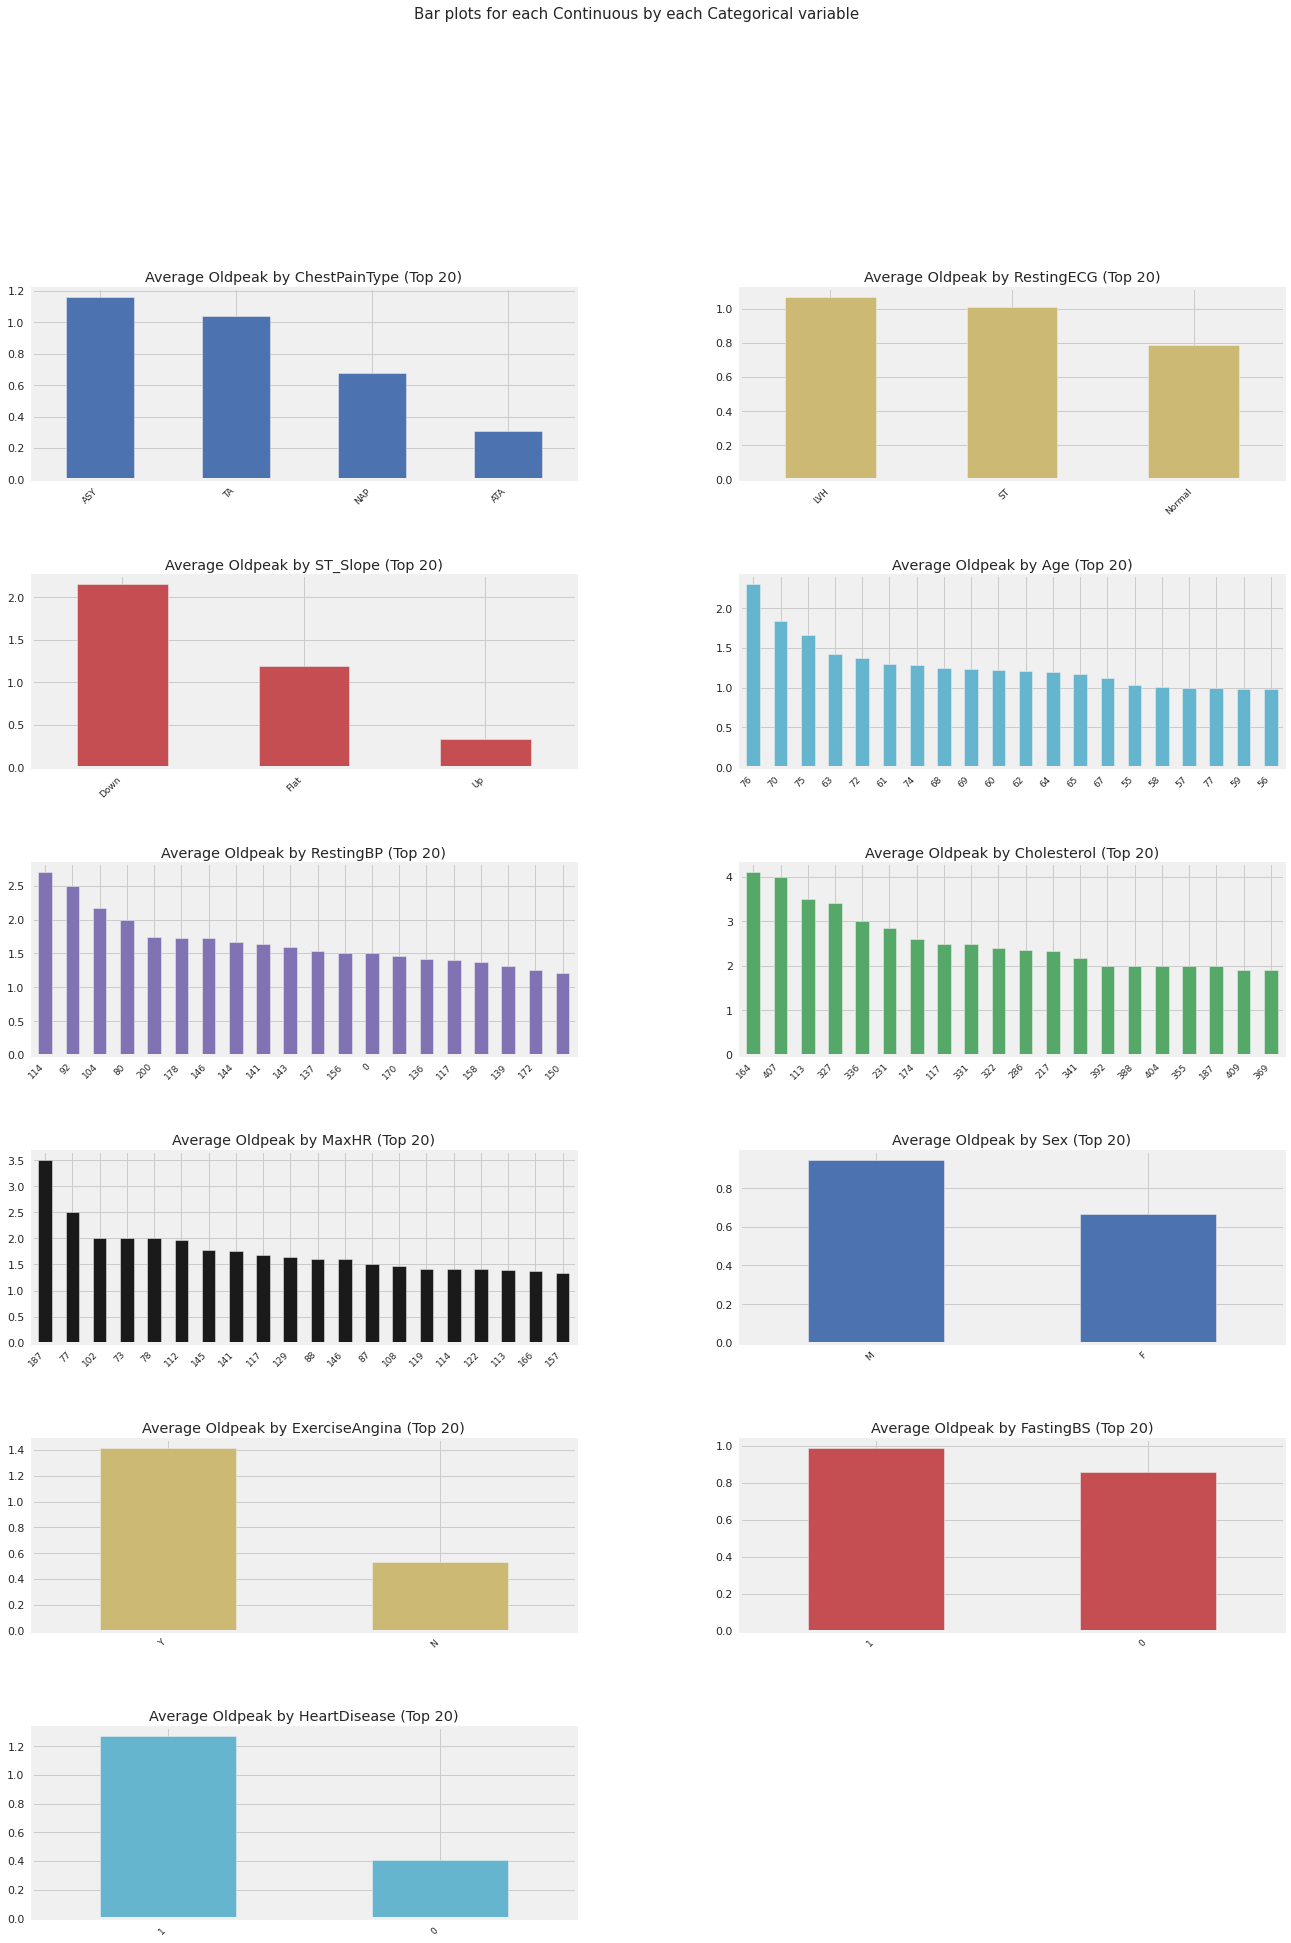

Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [27]:
df_av = AV.AutoViz('heart.csv')

# Correlation of The Variable

In [28]:
df.corr()[:12]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


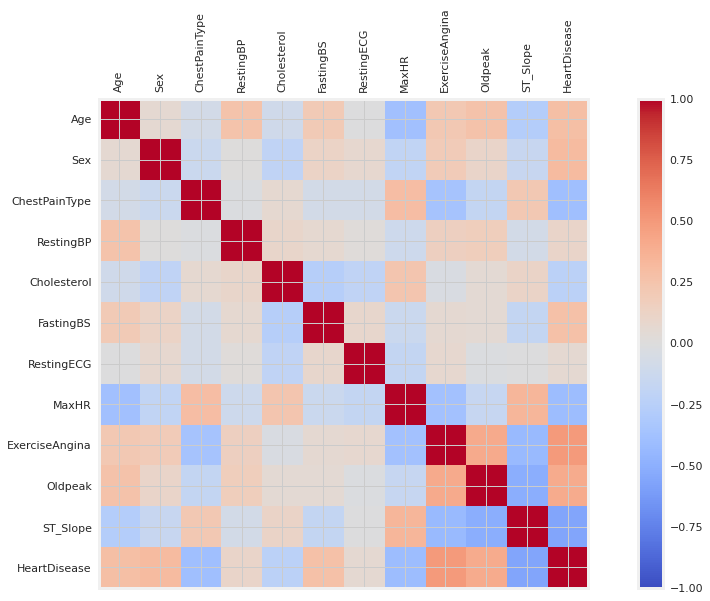

In [29]:
corr = df.corr()
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

From the results of the correlation test on this dataset, it was found that Angina Exercise had an effect on Heart Failure variables but had no much significant effect. The oher variables that had an effect on Heart Failure are Age, Resting Blood Pressure, Fasting Blood Sugar, Sex and Oldpeak.

For better experience, I'll use heatmap.

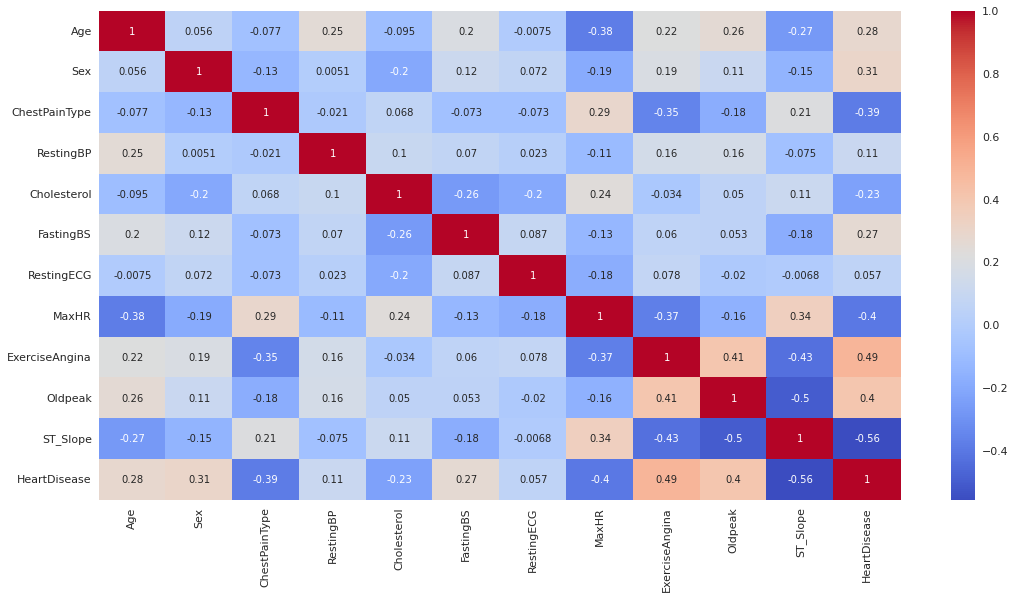

In [30]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm')
plt.show()

# Conclusion 

## Angina Exercise Factor

As previously stated, the angina exercise variable is the biggest factor that affects a person experiencing heart failure.

These results are in accordance with the research of Parikh et.al (2016), where the study found that people with angina pectoris experienced a heart failure rate of 22%, which was also associated with increased rates of depression in patients. People in a study conducted by Parikh et.al (2016) found that patients with angina pectoris and not exercising experienced a worsening of their condition and quality of life, while patients with angina pectoris who did exercise had a better quality of life although not significantly with p-value is 0.019.

Parikh et al's research (2016) also concluded that oldpeak in patients who did not do angina exercise had worse levels of depression. Depression was common (21%) in the overall HF-ACTION population, but patients with AP had increased prevalence and severity of depression along with worse HRQoL. Patients with worse depression rates also have a higher chance of being rushed to the hospital for their angina pectoris.

## Cholesterol and Diabetes

Based on research conducted by Kumowski, Marx, and Schutt (2021), Diabetes is a very important comorbidity in patients with heart failure. When both diseases coexist cardiovascular morbidity and mortality is greatly increased. However, the results of this dataset are different from the results of this study, because in this dataset the diabetes factor represented by Fasting Blood Sugar was found to have a correlation value of 0.27, while in the study of Kumowski, Marx, and Schutt (2021) it was said that diabetic patients had a higher risk of heart failure.

The cholesterol factor in this dataset has a correlation value of -0.23 and this result is in line with research conducted by Kato, Takao (2021), where the T-Chol value has a p-value of 0.02 which means that internal cholesterol levels have no significant effect. to the risk of heart failure. In the same study, the hazard ratio for all-case death per grade was most prominent in albumin, followed by lymphocyte count and total cholesterol.